## A classification problem that aims to predict the top genre that a song belongs to

Team Name : CS986FoMLDAGroup19 <br>
Team Members : <br> Meghal Lotia (Registration number : 202168368 ) <br> Ryan Dougan (Registration number : 202181897 ) <br> Siraaj Shaikh (Registration number : 202155449 ) <br> Tiger Garcia (Registration number : 202150828 )

### Table of Contents

#### Introduction

#### Required libraries

#### The problem domain

#### Step 1: Answering the question

#### Step 2: Checking the data

#### Step 3: Tidying the data

#### Step 4: Exploratory analysis

#### Step 5: Classification

#### Cross-validation

#### Parameter tuning

#### Step 6: Validation

#### Step 7: Conclusion

## Introduction

This document deals with identifying "top genre" of a song, given various attributes of the song. Both Training dataset and Test dataset are available which consists of various attributes of different songs. The training data set will be used to build the machine learning model. The Test dataset will be used to perform validation of the model by uploading the target values arrived from the machine learning  model into kaggle. 

The Training dataset consists of total of 15 columns out of which 12 columns are numeric values and the remaining 3 columns are string values. The Test dataset conists of all columns present in the Training dataset except for the "top genre" column.

## Required libraries

This notebook uses several Python packages that come inbuilt with the Anaconda Python distribution. <br> The primary libraries that are used are mentioned below for reference:

NumPy: For creating arrays

pandas: For Data frames used in handling the csv data

matplotlib.pyplot and Seaborn : For plotting graphs (histograms, pairplots)

imblearn : For oversampling the Data

sklearn: For modelling the problem using machine learning algorithms

metrics : For creating confusion matrix, classification report and understanding Accuracy, precision, recall and F1 score

Scale from sklearn.preprocessing : For scaling the data

PolynomialFeatures : For adding a degree of polynomial to the data

## The problem domain

The problem deals with classification of songs into different "top genre". The Training dataset has different values for the "top genre" for different songs, hence the problem is a multiclass classification (multinomial classifiers). The goal is to build a model that can accurately predict the "top genre" to which a given song belongs to.

Columns part of the csv file (This data is taken from Kaggle website)  <br>  
Id - an arbitrary unique track identifier  <br> 
title - track title  <br>
artist - singer or band  <br> 
year - year of release (or re-release)  <br> 
bpm - beats per minute (tempo)  <br>
nrgy - energy: the higher the value the more energetic  <br> 
dnce - danceability: the higher the value, the easier it is to dance to this song  <br> 
dB - loudness (dB): the higher the value, the louder the song  <br> 
live - liveness: the higher the value, the more likely the song is a live recording  <br> 
val - valence: the higher the value, the more positive mood for the song  <br> 
dur - duration: the length of the song  <br> 
acous - acousticness: the higher the value the more acoustic the song is  <br> 
spch - speechiness: the higher the value the more spoken word the song contains  <br> 
pop - popularity: the higher the value the more popular the song is  <br> 
top genre - genre of the track (and the target variable for this problem)  <br> 

## Step 1: Answering the question

This document deals with classifying the songs based on attributes of the song such as year, beats per minute, energy, Dance, DB, Live, valence, acoustics, speech and popularity.

Various metrics are available to measure the performance of Classification problems such as Accuracy, Precision, Recall and F1 score.

As part of this problem, Accuracy will be used as a metric to measure the performance of the classification.

## Step 2: Checking the data

Before modelling the data the best practice is always to understand the data and look for missing values and outliers in the data 

The data needs to be explored to understand whether any data fixes are required before proceeding with modelling the data. Let us start with loading the data using pandas library of python

In [1]:
import pandas as pd #Import Pandas library
import numpy as np #Import numpy library
songs_data = pd.read_csv("CS98XClassificationTrain.csv") #load the Train data from csv into a Dataframe

In [2]:
# To suppress warnings generated
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', None) # Display all the rows of data completely without any truncation of display

In [4]:
songs_data.head() # The various columns of the dataset can be seen below

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [5]:
songs_data.shape # Displays the shape of the dataset, that is number of rows and columns in the dataset

(453, 15)

In [6]:
print(songs_data.isnull().values.any()) # Check for null value if any in the Dataset

True


In [7]:
print(songs_data.isnull().sum().sum()) # Check for the total count of null values in the Dataset

15


In [8]:
songs_data.isnull().any() # Check for null value if any in the Dataset

Id           False
title        False
artist       False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
top genre     True
dtype: bool

Based on the above outputs it can be seen that there are 15 rows for which the data of "top genre" column is not available in the Training dataset. As the problem statement deals with classification of the songs into different "top genre", the Training dataset without the values in the "top genre" column is not helpful as part of the modelling. Hence such rows need to be dropped from the dataset as the problem deals with Supervised learning and hence target value is mandatory for building supervised learning models. 

In [9]:
songs_data = songs_data.dropna() # Drop rows from the DataFrame which have null values

In [10]:
print(songs_data.isnull().values.any()) # Check for null value if any in the Dataset

False


In [11]:
print(songs_data.isnull().sum().sum()) # Check for the total count of null values in the Dataset

0


In [12]:
songs_data.shape # Displays the shape of the dataset, that is number of rows and columns in the dataset

(438, 15)

Describe function of the DataFrames is used to understand the numeric columns of the dataset better. The describe function is quite useful and helps to understand whether there is any missing data in the columns (based on the value of count shown). It also helps to understand the minimum and maximum value, along with mean, standard deviation and percentile values.

From the Output of the describe function it can be concluded that there are no missing values for each of the numeric columns present in the dataset (the rows having missing values have already been dropped)

In [13]:
songs_data.describe() #List the statistic information on numeric columns using describe function

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,227.600457,1990.881279,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,130.463047,16.697047,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,116.250000,1976.000000,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,226.500000,1993.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,340.750000,2006.000000,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


Boxplots are often used for Outlier detection. While all the boxplots for different numeric values can be plotted in one figure, plotting the boxplot seperately for for each column helps in better visualization of the data.

<AxesSubplot:>

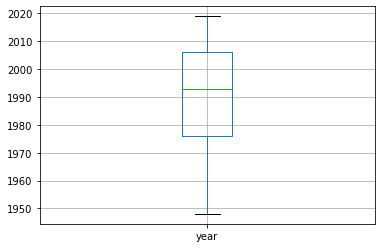

In [14]:
#Box plot of year Column
songs_data.boxplot('year')

<AxesSubplot:>

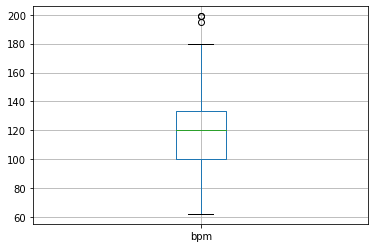

In [15]:
#Box plot of bpm Column
songs_data.boxplot('bpm')

<AxesSubplot:>

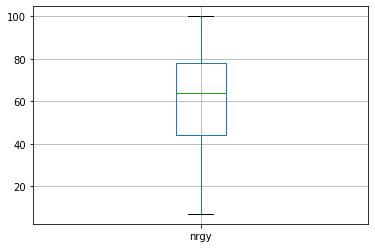

In [16]:
#Box plot of nrgy Column
songs_data.boxplot('nrgy')

<AxesSubplot:>

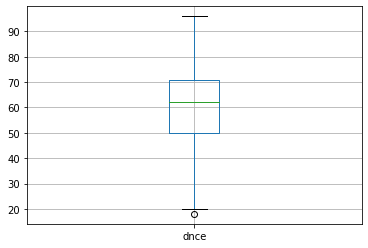

In [17]:
#Box plot of dnce Column
songs_data.boxplot('dnce')

<AxesSubplot:>

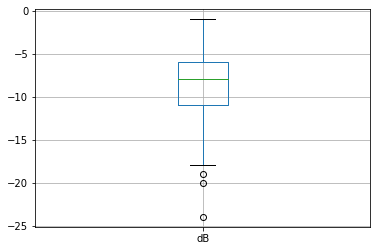

In [18]:
#Box plot of dB Column
songs_data.boxplot('dB')

<AxesSubplot:>

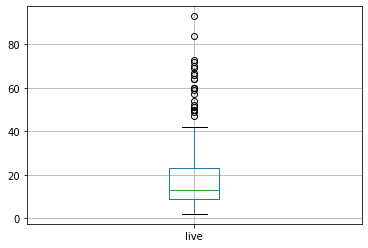

In [19]:
#Box plot of live Column
songs_data.boxplot('live')

<AxesSubplot:>

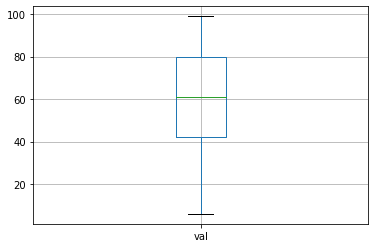

In [20]:
#Box plot of val Column
songs_data.boxplot('val')

<AxesSubplot:>

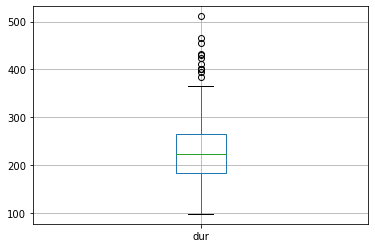

In [21]:
#Box plot of dur Column
songs_data.boxplot('dur')

<AxesSubplot:>

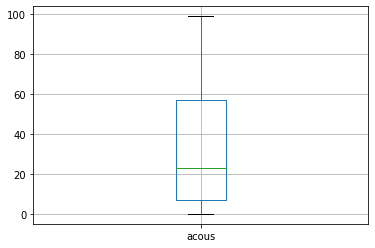

In [22]:
#Box plot of acous Column
songs_data.boxplot('acous')

<AxesSubplot:>

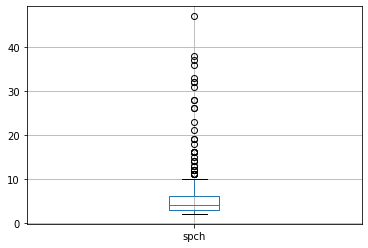

In [23]:
#Box plot of spch Column
songs_data.boxplot('spch')

<AxesSubplot:>

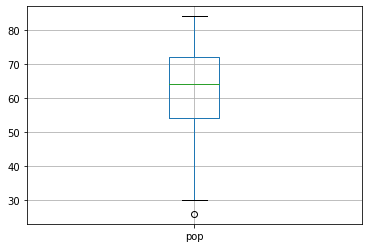

In [24]:
#Box plot of pop Column
songs_data.boxplot('pop')

Large number of outliers are seen for columns such as live, spch and duration. These outliers belong to different "top genre" and the dataset is small unless the outlier is verified as totally wrong value the data cannot be modified, hence it is not possible to drop these instances.

The Id column part of the dataset is mainly used to provide a unique identifier to each song in the dataset. The Id column does not help in determing the "top genre" of a song.

Also columns such as title and artist are string values and these values are not useful in prediciting the classification of a song, hence it is appropriate to exclude these columns from further analysis. The primary data is present in the dataframe songs_data. Additionally a new dataframe songs_data_numeric is created which has only numeric values.

In [25]:
# Drop the title and artist column from the dataset and store the result in a new dataframe
songs_data_numeric = songs_data.drop(['Id','title','artist','top genre'], axis=1)

In [26]:
songs_data_numeric.head() # The various columns of the dataset can be seen below

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1996,107,31,45,-8,13,28,150,75,3,44
2,1979,105,36,63,-9,13,67,245,11,3,77
3,1980,170,28,47,-16,13,33,232,25,3,67
4,1973,121,47,56,-8,15,40,193,45,3,63
5,2010,110,56,71,-7,12,23,223,15,6,74


In [27]:
songs_data_numeric.shape # Displays the shape of the dataset, that is number of rows and columns in the dataset

(438, 11)

In [28]:
songs_data_numeric.head() # The various columns of the dataset can be seen below

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1996,107,31,45,-8,13,28,150,75,3,44
2,1979,105,36,63,-9,13,67,245,11,3,77
3,1980,170,28,47,-16,13,33,232,25,3,67
4,1973,121,47,56,-8,15,40,193,45,3,63
5,2010,110,56,71,-7,12,23,223,15,6,74


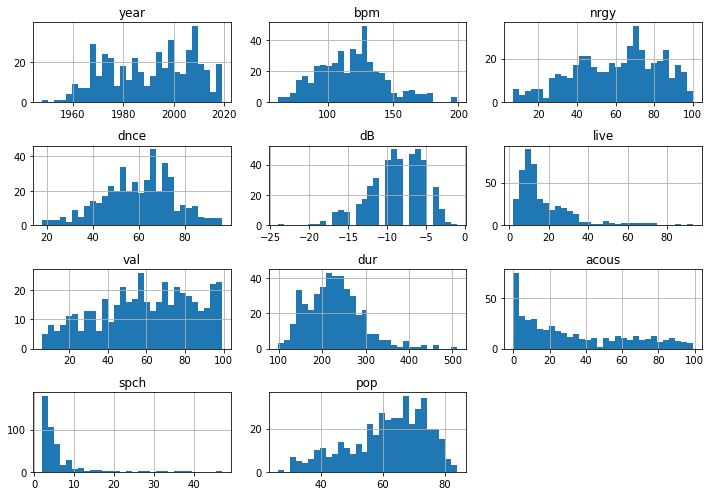

In [29]:
#Plot histograms of the numeric data available, this helps to identify how the data is spread
import matplotlib.pyplot as plt
%matplotlib inline
songs_data_numeric.hist(bins=30, figsize=(10,7))
plt.tight_layout()
plt.show()

Machine learning algorithms perform better if the data is normally distributed except for columns such as live, acous and spch the data looks to be normally distributed for other columns.

Before proceeding with modelling the data it is important to identify different patterns in the data that is interdependence of features and also to identify the relationship between the features and the target, for this purpose the data is analysed further using pairplots, heatmap of correlation, feature_importances and chi square test to identify features which have significant impact on the target value.

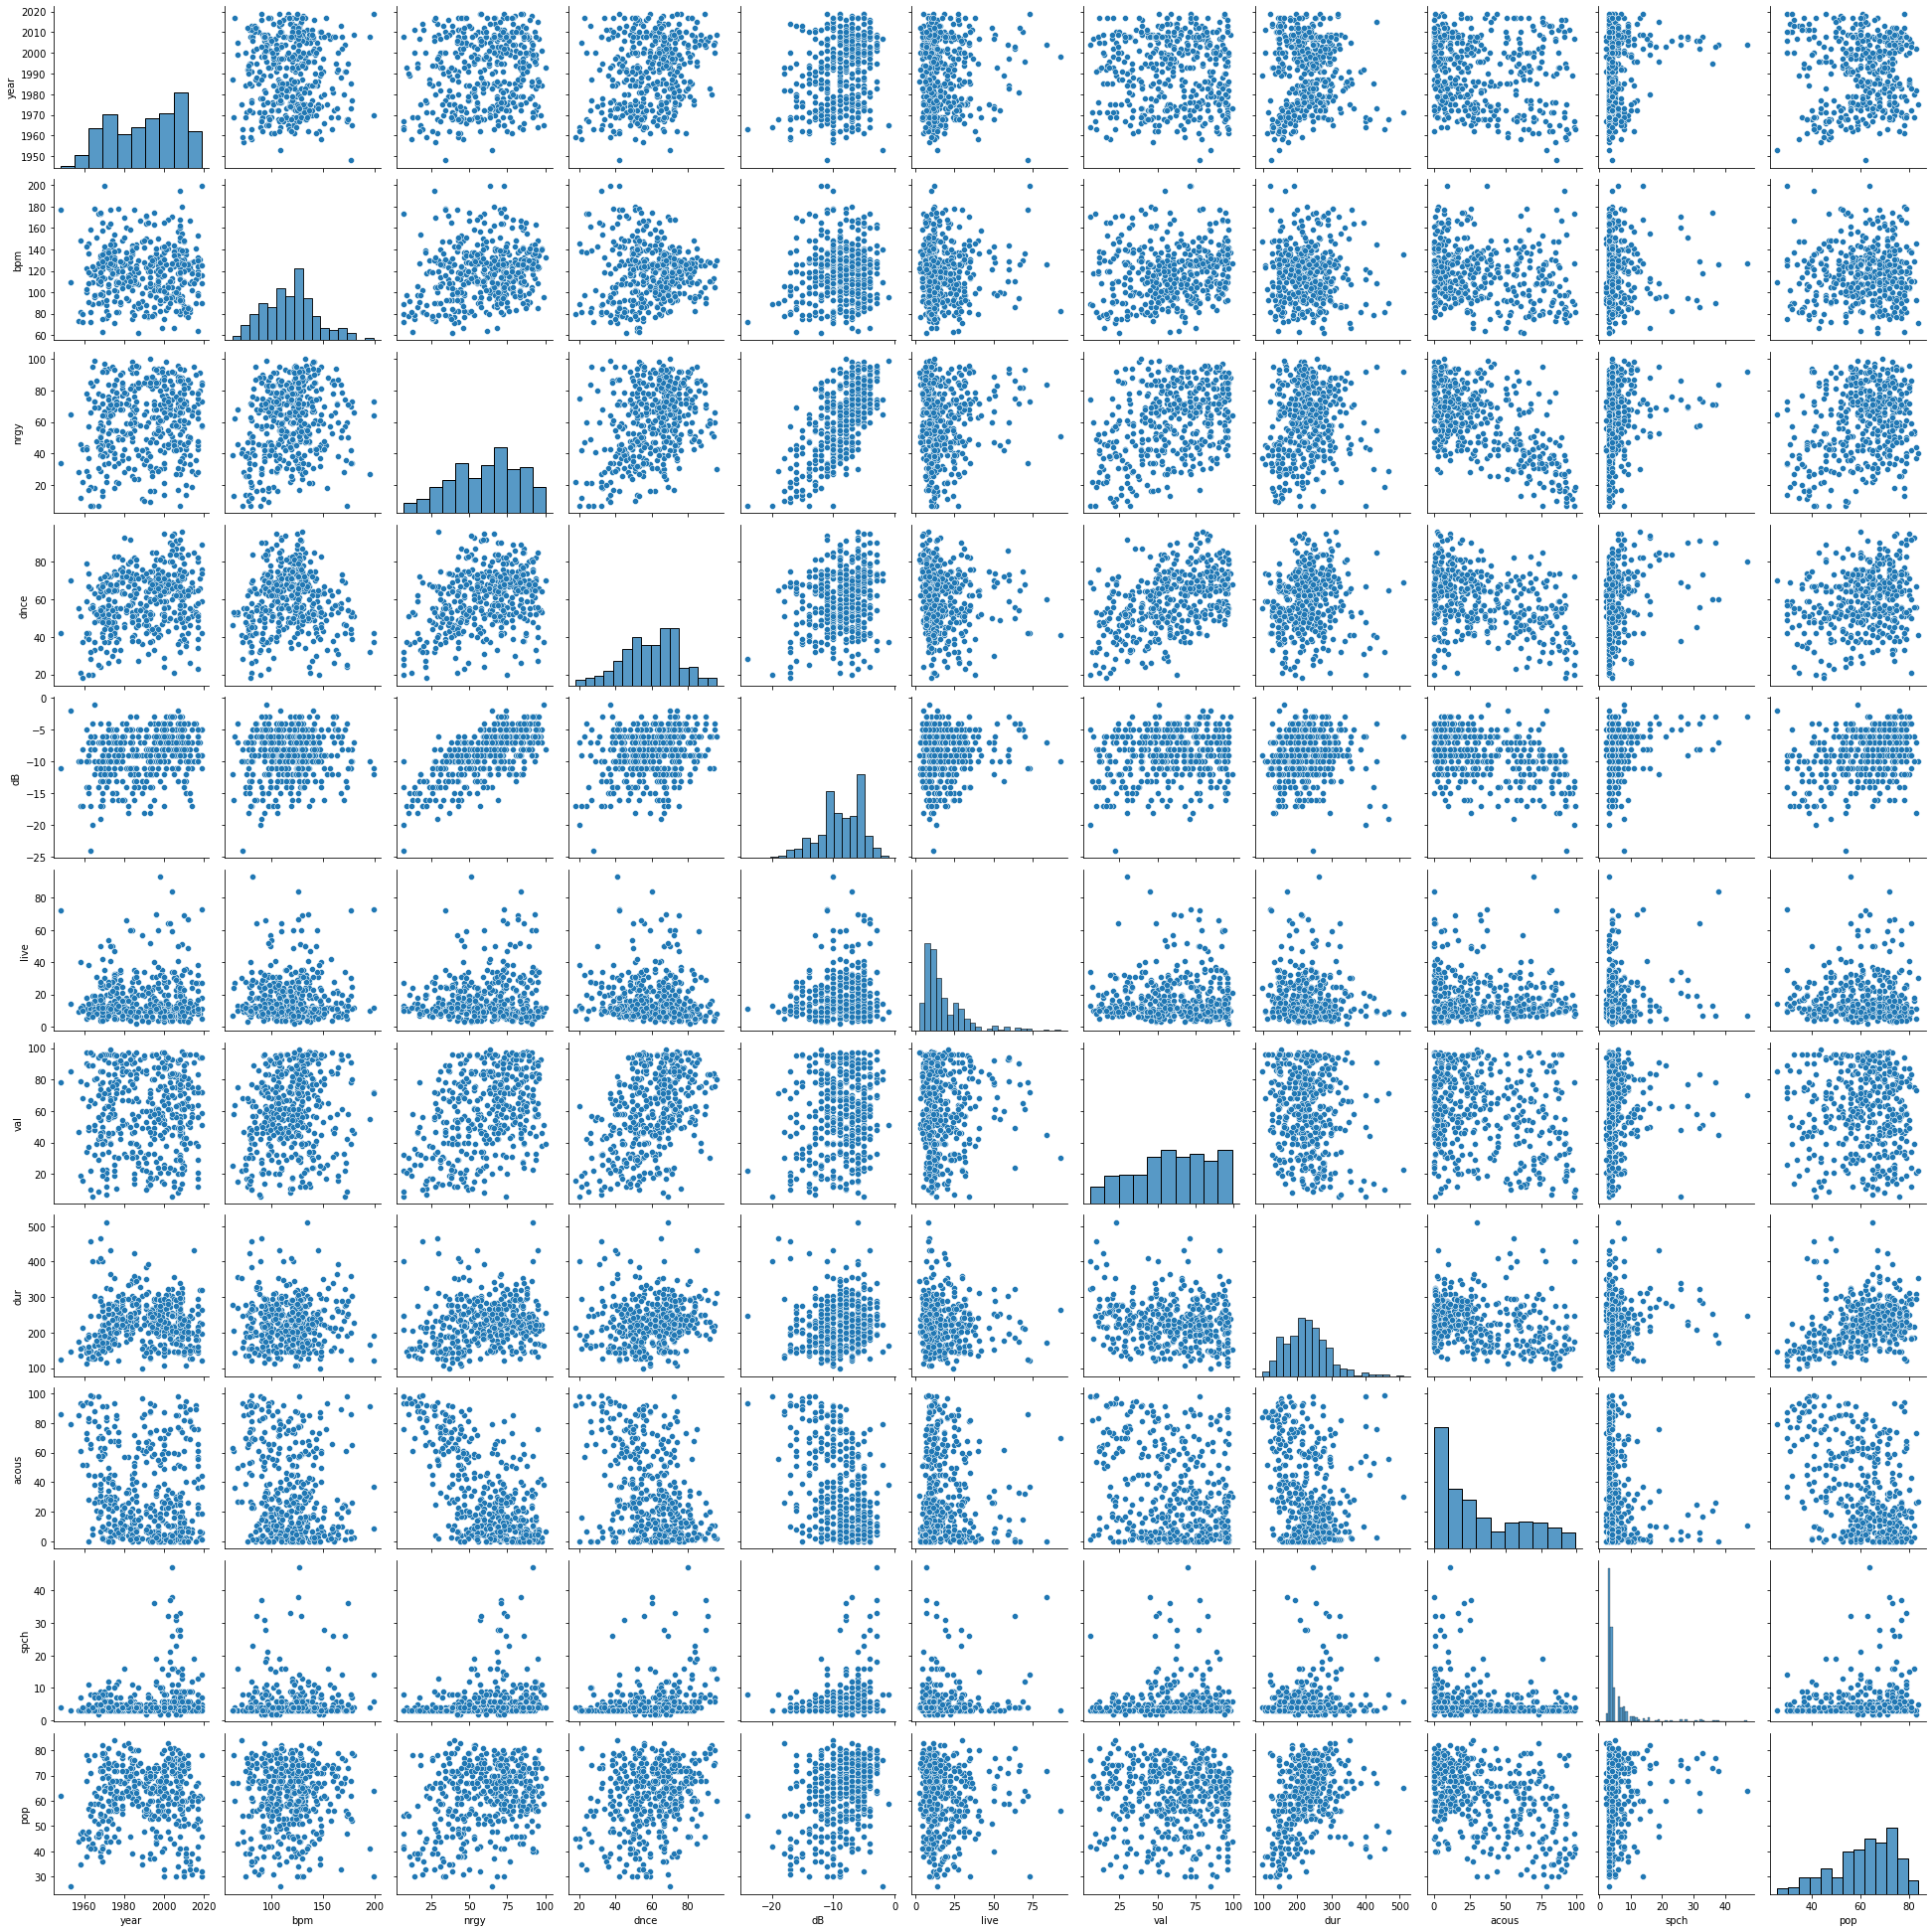

In [30]:
# Plot a pairplot of all columns present in the DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(songs_data_numeric)

From the pairplot it is not possible to get a numeric value of the degree of correlation between different features hence the data is explored further using a heatmap of correlation coefficients.

<AxesSubplot:>

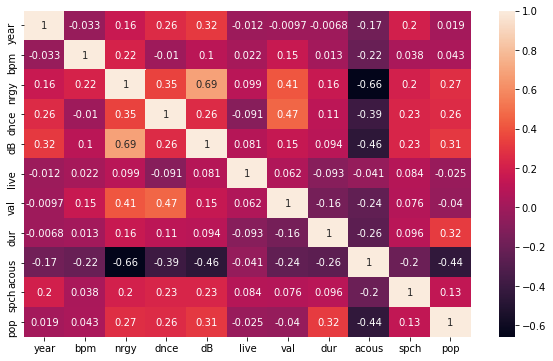

In [31]:
corr = songs_data_numeric.corr() # The correlation between numeric columns is plotted using a heatmap as shown below :
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

Correlation coefficient values above 0.5 or below -0.5 are considered to inidcate strong value of correlation between the features.

In [32]:
u = corr[corr > 0.5] # Data Frame with correlation coeeficient values > 0.5
v = corr[corr < -0.5] # Data Frame with correlation coeeficient values < -0.5

In [33]:
u #list the value of the dataFrame

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,1.000000,NaN,0.687504,NaN,NaN,NaN,NaN,NaN,NaN
dnce,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dB,NaN,NaN,0.687504,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
live,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
acous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
spch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [34]:
v #list the value of the dataFrame

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.658299,NaN,NaN
dnce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acous,NaN,NaN,-0.658299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the output of the above commands it can be seen that there is hardly any strong correlation between features, let us explore whether mild correlation exists (correlation above 0.25 or correlation below -0.25)

In [35]:
u = corr[corr > 0.25] # Data Frame with correlation coeeficient values > 0.25
v = corr[corr < -0.25] # Data Frame with correlation coeeficient values > -0.25

In [36]:
u #list the value of the dataFrame

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.000000,NaN,NaN,0.255916,0.317036,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,1.000000,0.345836,0.687504,NaN,0.411215,NaN,NaN,NaN,0.274006
dnce,0.255916,NaN,0.345836,1.000000,0.255577,NaN,0.467307,NaN,NaN,NaN,0.256099
dB,0.317036,NaN,0.687504,0.255577,1.000000,NaN,NaN,NaN,NaN,NaN,0.312952
live,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,0.411215,0.467307,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.321028
acous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
spch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [37]:
v #list the value of the dataFrame

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrgy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.658299,NaN,NaN
dnce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.389641,NaN,NaN
dB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.460821,NaN,NaN
live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
val,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.260960,NaN,NaN
acous,NaN,NaN,-0.658299,-0.389641,-0.460821,NaN,NaN,-0.26096,NaN,NaN,-0.443763
spch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From the output of the above commands it can be seen that there is no significant presence of mild correlation, which results in the conclusion that the dataset has features which are weakly correlated, which is not a good sign for modelling and the resultant model may have low accuracy

Chi square test and ExtraTreesClassifier help to identify features from the dataset that have influence on the target value

In [38]:
#Run the Chi square test on the dataset
X = songs_data_numeric.drop(['dB'], axis=1)
y = songs_data["top genre"] 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [1]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

NameError: name 'pd' is not defined

In [40]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [41]:
featureScores # Gives the list of features with corresponding score of each feature

,Specs,Score
0,year,28.635650
1,bpm,555.197962
2,nrgy,1653.271313
3,dnce,649.887132
4,live,1133.671587
5,val,1034.163037
6,dur,3789.390695
7,acous,5646.144742
8,spch,1289.225162
9,pop,593.847858


In [42]:
# Gives the list of features with corresponding score of each feature for the top 10 scores
print(featureScores.nlargest(10,'Score'))

   Specs        Score
7  acous  5646.144742
6    dur  3789.390695
2   nrgy  1653.271313
8   spch  1289.225162
4   live  1133.671587
5    val  1034.163037
3   dnce   649.887132
9    pop   593.847858
1    bpm   555.197962
0   year    28.635650


From the output of chi square test as shown above it can be seen that columns such as acous, dur, nrgy, spch and live have high influence on the target value

Below code performs feature importance using ExtraTreesClassifier

In [43]:
# ExtraTreesClassifier is executed on the dataset
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [44]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.13278109 0.09520473 0.09898039 0.09399795 0.08697634 0.09077158
 0.11109804 0.10853297 0.07787377 0.10378315]


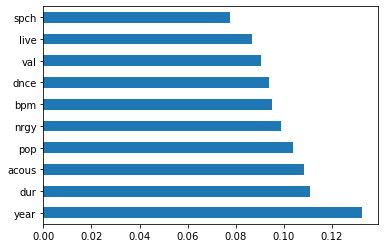

In [45]:
#plot graph of feature importances for better visualization (top 10 features)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The higher the value shown by ExtraTreesClassifier the more significane the feature has on the target value. From the graph above it can be seen that columns such as year, dur, acous, nrgy , pop have high influence on the target value "top genre" 

#### Chi square test suggests top 5 columns having influence on "top genre" as acous, dur, nrgy, spch and live 

#### ExtraTreesClassifier suggests top 5 columns having influence on "top genre" as year, dur, acous , nrgy, pop

##### From the above tests it is not very clear which columns have high degree of influence on "top genre" hence all columns are considered for modelling the classification

## Step 3: Tidying the data

As the data is not linearly seperable (as seen from pairplots) it is also important to add polynomial features to the data as this helps in classification of the different classes in the dataset

In [46]:
#X = songs_data_numeric[['nrgy','dnce','dur','acous','pop']]
X = songs_data_numeric
# Fit the X_train data into a polynomial of degree 6
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

In [47]:
X_poly.shape #Shape of the DataFrame

(438, 77)

As can be seen from the output of the above command the number of columns part of X have increased after polynomial feature of degree 2 has been introduced. Higer degree of polynomial was explored such as 3 , 4 but the results were not having better accuracy hence the degree is set to 2

In [48]:
X.var() #Variance of different columns in the dataframe

year      278.791365
bpm       633.817649
nrgy      487.953068
dnce      237.306542
dB         12.895317
live      190.646840
val       599.278246
dur      4022.960518
acous     857.313250
spch       31.040406
pop       162.801083
dtype: float64

As seen from the above command the variance is significantly different across each of the columns. The numeric columns seem to have different scales. Hence at this point it is important to scale the Data and ensure that the different columns have numeric values with similar scale


In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Scalar Function
X_poly_scaled = scaler.fit_transform(X_poly.astype(np.float64))
X_poly_scaled = pd.DataFrame(X_poly_scaled)


In [50]:
X = X_poly_scaled # Set the polynomial scaled value to X

In [51]:
X.var() #Variance of different columns in the dataframe

0     1.002288
1     1.002288
2     1.002288
3     1.002288
4     1.002288
5     1.002288
6     1.002288
7     1.002288
8     1.002288
9     1.002288
10    1.002288
11    1.002288
12    1.002288
13    1.002288
14    1.002288
15    1.002288
16    1.002288
17    1.002288
18    1.002288
19    1.002288
20    1.002288
21    1.002288
22    1.002288
23    1.002288
24    1.002288
25    1.002288
26    1.002288
27    1.002288
28    1.002288
29    1.002288
30    1.002288
31    1.002288
32    1.002288
33    1.002288
34    1.002288
35    1.002288
36    1.002288
37    1.002288
38    1.002288
39    1.002288
40    1.002288
41    1.002288
42    1.002288
43    1.002288
44    1.002288
45    1.002288
46    1.002288
47    1.002288
48    1.002288
49    1.002288
50    1.002288
51    1.002288
52    1.002288
53    1.002288
54    1.002288
55    1.002288
56    1.002288
57    1.002288
58    1.002288
59    1.002288
60    1.002288
61    1.002288
62    1.002288
63    1.002288
64    1.002288
65    1.002288
66    1.00

After scaling the data it can now be seen that the data across all columns is having similar scale and the variance is same across each columns of the scaled numeric data

In [52]:
X.shape # Displays the shape of the dataset, that is number of rows and columns in the dataset

(438, 77)

In [53]:
y.shape # Displays the shape of the dataset, that is number of rows and columns in the dataset

(438,)

As can be seen from the output of the below command out of the 438 rows of data present in Training dataset (from csv) there are 86 different values for "top genre"

In [54]:
songs_data.value_counts("top genre") #Counts of each "top genre" in the dataset

top genre
adult standards            68
album rock                 66
dance pop                  61
glam rock                  16
brill building pop         16
europop                    14
dance rock                 13
boy band                   10
british invasion            8
bubblegum dance             7
art rock                    7
disco                       7
eurodance                   6
deep adult standards        6
atl hip hop                 6
barbadian pop               6
pop                         5
british soul                5
soft rock                   5
classic soul                5
doo-wop                     4
classic uk pop              4
east coast hip hop          4
g funk                      3
new wave pop                3
disco house                 3
canadian pop                2
glam metal                  2
detroit hip hop             2
celtic rock                 2
chanson                     2
chicago rap                 2
country rock                2


It can be seen that the dataset is highly imbalanced that is around 78 categories out of the 86 categories of "top genre" have less than 10 records of the data. 

Also from the output of the below command it can be seen 40 categories of "top genre" have one only one record in the dataset which is to say that almost 50% of the categories of "top genre" are represented by just 1 record in the dataset

In [55]:
songs_data.value_counts("top genre").tail(41)

top genre
merseybeat                 2
uk garage                  1
rock-and-roll              1
r&b                        1
neo mellow                 1
glam punk                  1
mellow gold                1
german alternative rock    1
louisiana blues            1
latin                      1
italian pop                1
hip pop                    1
german dance               1
hi-nrg                     1
acoustic blues             1
drone folk                 1
deep house                 1
afrobeat                   1
afropop                    1
alternative rock           1
american folk revival      1
australian rock            1
australian talent show     1
avant-garde jazz           1
baroque pop                1
belgian dance              1
blues                      1
boogaloo                   1
bow pop                    1
brit funk                  1
british blues              1
british comedy             1
british dance band         1
britpop                    1
bubb

The Training data and Test Data are given seperately as part of different csv files

Hence there is no train_test_split required the data is readily available as train and test data as part of the csv files

In [56]:
#Initializing the value of X to X_train and y to y_train, which is the data from CS98XClassificationTrain.csv
#Initializing the value of X to X_test and y_test to y, which is the data from CS98XClassificationTrain.csv

X_train = X
X_test = X
y_train = y
y_test = y

If in future it is required to split the data from X (CS98XClassificationTrain.csv) into train and test split the design is kept flexible

In [57]:
print(X_train.shape) # print the shape of X_train
print(X_test.shape)  # print the shape of X_test
print(y_train.shape) # print the shape of y_train
print(y_test.shape)  # print the shape of y_test

(438, 77)
(438, 77)
(438,)
(438,)


## Step 4: Exploratory analysis

As the data is imbalanced and the size of the dataset is small, techniques of oversampling such as SMOTE and RandomOverSampler were explored. 

Under sampling was not explored as the dataset is to small and undersampling will further result in loss of data. Undersampling is mainly for huge datasets.

SMOTE: Synthetic Minority Over-sampling Technique, error was seen while using SMOTE over oversampling as SMOTE expects the minimum instance of a given category to be greater than 1. The dataset has several "top genre" values which have just one record in the Train dataset. Hence the idea of using SMOTE over oversampling for dropped.

The code that was tried for oversampling using SMOTE is mentioned below for reference

In [58]:
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='auto', random_state=42)
# # Fit the model to generate the data.
# oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
# sns.countplot(oversampled["top genre"])
# X_train = X_res
# y_train = y_res
# X_test = X_res
# y_test = y_res

RandomOverSampler was used for oversampling wherein the sampling strategy was set to auto. The oversampler created samples of records ensuring a balanced dataset of representing all classes is created. However even on using random oversampler the accuracy decreased, which is mainly due to overfitting of the training model, hence the idea of oversampling was dropped

The code that was tried as partof random oversampling using SMOTE is mentioned below for reference

In [59]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(sampling_strategy='all',random_state=42)
# X_res, y_res = ros.fit_resample(X_train, y_train)
# oversampled = pd.concat([pd.DataFrame(y_res), pd.DataFrame(X_res)], axis=1)
# plt.figure(figsize=(20,8))
# sns.countplot(oversampled["top genre"])
# X_train = X_res
# y_train = y_res
# X_test = X_res
# y_test = y_res
# oversampled.value_counts("top genre")

In [60]:
print(X_train.shape) # print the shape of X_train
print(X_test.shape)  # print the shape of X_test
print(y_train.shape) # print the shape of y_train
print(y_test.shape)  # print the shape of y_test

(438, 77)
(438, 77)
(438,)
(438,)


## Step 5: Classification

### LinearSVC

LinearSVC on scaled data with polynomial features is quite helpful in classifying non linear data. As the dataset we are dealing with is non linear this will be a very useful technique to implement. The best way to do this is to create a pipeline containing PolynomialFeatures followed by StandardScaler and a LinearSVC as shown below. The LinearSVC class regularizes the bias term if StandardScalar is used.

LinearSVC is much faster than SVC(kernel="linear")) especially when number of features in the dataset is high, which is exactly the case with the dataset we are dealing, which has 11 features.

In [61]:
from sklearn.svm import LinearSVC #Import the LinearSVC class
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

The below part of code is commented because we already have data with polynomial features, which is already scaled.

In [62]:
# from sklearn.pipeline import Pipeline
# polynomial_svm_clf = Pipeline([
# ("poly_features", PolynomialFeatures(degree=6)),
# ("scaler", StandardScaler()),
# ("svm_clf", LinearSVC(C=10, loss="hinge",random_state=42))
# ])

In [63]:
# The below piece of code trains a LinearSVC model
polynomial_svm_clf = LinearSVC(C=0.1, random_state=42,multi_class='ovr',dual=False) 
polynomial_svm_clf.fit(X_train, y_train)
polypreds = polynomial_svm_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,polypreds))

Accuracy: 0.4840182648401826


As seen from the above code the multi_class is set as ovr which means one verses rest classifier. The classifier will pick a feature and train the model by fitting the feature against rest of the features. The accuracy is average.

In [64]:
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, polypreds))
# print("\nClassification report:\n",classification_report(y_test, polypreds))
# print("\nPrecision:", precision_score(y_test,polypreds, average='micro'))
# print("\nRecall:",recall_score(y_test,polypreds, average='micro'))
# print("\nF1 Score:", f1_score(y_test,polypreds, average='micro'))

### LogisticRegression (Softmax Regression)

LogisticRegression : Some of the regression algorithms can be used for classification as this algorithm predicts the probability of an item belonging to a particular class. Logistic regression can be directly used for multi classification problems wihtout having to combine multiple binary classifiers this method is also known as SoftMax Regression or Multinomial Logistic Regression.

The multi_class parameter must be set to "multinomial" as this ensures the method is not performing one versus rest classification

The lower the value of C the more the model is regularised. As can be seen from the below code the C value is set to 0.05

The model first computes the scores and then classifies the data based on probability. 

In [65]:
# The below piece of code trains a LogisticRegression model
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",C=0.05,penalty='l2',random_state=42)
softmax_reg.fit(X_train, y_train)
softmax_reg_predicitions = softmax_reg.predict(X_test)
print("Accuracy:",accuracy_score(y_test,softmax_reg_predicitions))

Accuracy: 0.3949771689497717


As seen from the above the accuracy is average this could be because the model is not able to arrive at the correct probability score for each category of the top genre and hence is unable to accurately predict the "top genre" of the given song.

In [66]:
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, softmax_reg_predicitions))
# print("\nClassification report:\n",classification_report(y_test, softmax_reg_predicitions))
# print("\nPrecision:", precision_score(y_test,softmax_reg_predicitions, average='micro'))
# print("\nRecall:",recall_score(y_test,softmax_reg_predicitions, average='micro'))
# print("\nF1 Score:", f1_score(y_test,softmax_reg_predicitions, average='micro'))

### Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) : This classifier is helpful when using large sets of data. SGD handles each instance one at a time and is also useful in online learning. SGD relies on randomness during training.

The default value of epsilon is 0.1 this is adjusted to get results with high accuracy. The SGD classifier directly classifies the instances into multiple classed using a decision function. If the SGD class is confident about a classification then the decision function value is positive and values for other classes are negative.

In [67]:
# The below piece of code trains a SGDClassifier model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='huber',penalty='l2',alpha=1.5,random_state=42,epsilon=4.0)
sgd_clf.fit(X_train, y_train)
sgd_predictions = sgd_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,sgd_predictions))

Accuracy: 0.3493150684931507


As seen from the above the accuracy is average and this is mainly due to the fact that decision function is unable to clearly distinguish the different categories

In [68]:
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, sgd_predictions))
# print("\nClassification report:\n",classification_report(y_test, sgd_predictions))
# print("\nPrecision:", precision_score(y_test,sgd_predictions, average='micro'))
# print("\nRecall:",recall_score(y_test,sgd_predictions, average='micro'))
# print("\nF1 Score:", f1_score(y_test,sgd_predictions, average='micro'))

### Decision Tree

Decision Tree is a power method and is capable of finding complex non linear relationship in the dataset. The DecisionTreeClassifier model of Decision trees is used for classification problems. The decision tree is ideal for scenarios having multiple classification as the decision tree creates a logical flow (similar to tree) and then based on the conditions splits the classification into different branches. Each node has a criteria and based on the criteria the node is split into different branches. The criteria of each node is arrived during training.

The decision tree requires regularization else there is a high possiblity that the model could overfit. Overfit meaning the model works well on training data but does not perform well on test data. For regularizing the decision tree it is recommended to decrease the hyperparamters starting with max_ and increase the parameters starting with min_.

The impurity of a node in the decision tree is measured by gini or entropy. The lower the value of gini and entropy implies high accuracy. Gini tries to isolate the most frequient class in its own branch but entropy tries to create more balanced trees. since the data set has 86 categories of "top genre" the approach of creating balanced trees using entropy is used.

The max_depth parameter value default value is None which means there is no restriction on the depth a tree could grow. Hence by setting max_parameters to 10 this is restricted as this helps to avoid overfitting

min_samples_split spcifies the minimum samples a node must have before splitting further. As we are dealing with a small dataset of 400+ records the minimum samples split is set to 2

max_features specifies the maximum number of features to evaluate before splitting each node.

In [69]:
# The below piece of code trains a DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion = "gini",max_depth=10, min_samples_split=2,min_samples_leaf=10,
                                  min_weight_fraction_leaf=0.2,max_features=None,
                                  random_state=42,max_leaf_nodes=None,min_impurity_decrease=0.0)
tree_clf.fit(X_train, y_train)
dtree_predictions = tree_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,dtree_predictions))

Accuracy: 0.3515981735159817


As seen from the above the accuracy is average as there are several categories of "top genre" without much instances of data and hence the model is not fitting accurately. This can be verified using cross validate which is discussed in the later section.

In [70]:
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, dtree_predictions))
# print("\nClassification report:\n",classification_report(y_test, dtree_predictions))
# print("Accuracy:",accuracy_score(y_test,dtree_predictions))
# print("\nPrecision:", precision_score(y_test,dtree_predictions, average='micro'))
# print("\nRecall:",recall_score(y_test,dtree_predictions, average='micro'))
# print("\nF1 Score:", f1_score(y_test,dtree_predictions, average='micro'))

[Text(0.3333333333333333, 0.875, 'X[37] <= -0.639\ngini = 0.925\nsamples = 438\nvalue = [1, 68, 1, 1, 66, 2, 1, 1, 2, 7, 6, 1, 1, 1\n6, 1, 2, 1, 2, 2, 1, 2, 1, 1, 10, 16, 1, 1\n1, 1, 2, 8, 5, 1, 2, 1, 7, 1, 1, 2, 2, 2\n2, 2, 1, 1, 2, 5, 4, 1, 2, 61, 13, 6, 1, 2\n7, 3, 4, 1, 4, 6, 14, 3, 1, 1, 2, 1, 16, 1\n2, 1, 1, 1, 1, 1, 2, 1, 3, 2, 5, 1, 1, 5\n1, 1]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.801\nsamples = 118\nvalue = [0, 50, 0, 0, 5, 0, 0, 1, 0, 4, 0, 0, 1, 1\n0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 10, 0, 1\n1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2\n0, 1, 0, 1, 0, 2, 2, 0, 2, 3, 1, 6, 0, 0\n0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0\n0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0\n0, 1]'),
 Text(0.5, 0.625, 'X[0] <= 0.037\ngini = 0.917\nsamples = 320\nvalue = [1, 18, 1, 1, 61, 2, 1, 0, 2, 3, 6, 1, 0, 0\n6, 1, 1, 1, 2, 2, 1, 1, 1, 1, 10, 6, 1, 0\n0, 0, 0, 6, 5, 1, 2, 1, 7, 1, 0, 2, 2, 0\n2, 1, 1, 0, 2, 3, 2, 1, 0, 58, 12, 0, 1, 2\n7, 3, 0, 1, 4, 6, 14, 3, 1, 1, 2, 1, 11, 1\n2, 0, 1, 1, 0, 0,

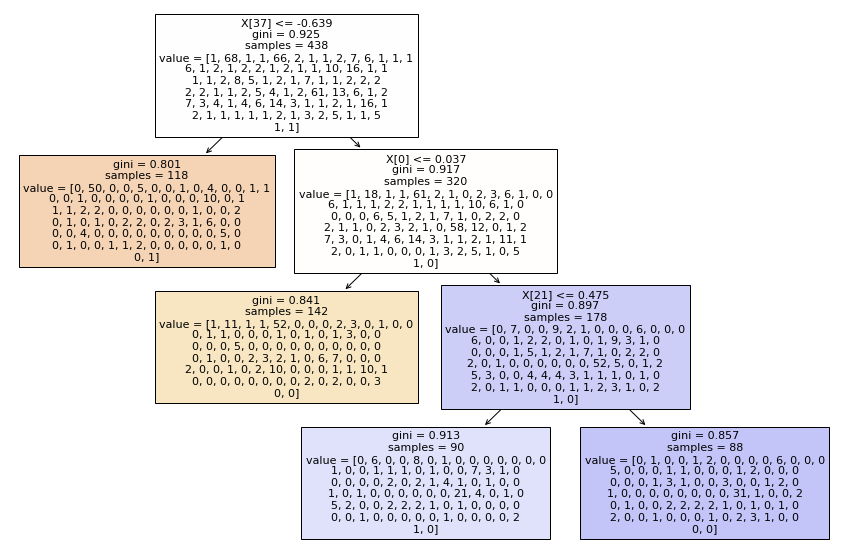

In [71]:
#The below code is used to pot the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf,filled=True)

The gini value must be less as gini is measure of impurity as seen from above diagram the gini value is very high for each node hence the decision tree is having low accuracy.

### Random Forests

Random Forests : Is one of the most powerful machine learning techniques. The random forest is an ensemble of Decision trees, which means random forests consist of several granular components which are decision trees. Instead of building a bagging classifier or pasting classifier and then passing the output to decision trees once can directly use the random forest classifier.

The random forest classifier introduces extra randomness when growing trees means it say instead of searching for a best feature while splitting a node the random forest searches best features among random subset of features. This results in higher tree diversity resulting in high bias and low variance and providing an overall better model

max_samples is a hyper paramter and it is recommended to set the value of this parameter to the size of the training set.
Setting the max_samples=None does the same (max_samples=None is the default value)

In [72]:
# The below piece of code trains a RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',n_estimators=1000,max_depth=2,min_samples_split=10,min_samples_leaf=3,
                             min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=5,
                             min_impurity_decrease=0.0,max_samples=None,random_state=42)
rfc.fit(X_train,y_train)
rf_predictions = rfc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,rf_predictions))

Accuracy: 0.3607305936073059


In [73]:
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, rf_predictions))
# print("\nClassification report:\n",classification_report(y_test, rf_predictions))
# print("\nPrecision:", precision_score(y_test,rf_predictions, average='micro'))
# print("\nRecall:",recall_score(y_test,rf_predictions, average='micro'))
# print("\nF1 Score:", f1_score(y_test,rf_predictions, average='micro'))

It is also possible to get the importance of each feature using Random forests. The same is shown below as can be seen that the features such as nrgy, dur, acous and pop show maximum importance. This is inline with Chi square test and feature selection performed earlier. This helps in feature selection that is if the idea is to reduce the number of features

In [74]:
# Below piece of code provides the feature importance used in RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(songs_data_numeric, songs_data["top genre"])
for name, score in zip(songs_data_numeric.columns, rnd_clf.feature_importances_):
    print(name, (score*100), '%')

year 12.21762846147858 %
bpm 9.298153144835439 %
nrgy 10.035441647511238 %
dnce 8.7022473536762 %
dB 7.33719040968272 %
live 7.876807683501812 %
val 8.63218581540488 %
dur 11.382532915357276 %
acous 9.314319533928215 %
spch 5.47638216555632 %
pop 9.72711086906733 %


As seen from the above the percentage of dependence on a feature is spread across the 11 columns hence it is difficult to drop the columns that are not required

### Pasting

Pasting : uses training algorithm for each feature and trains the same on different random subsets of the training set. Pasting performs sampling without replacement. As the dataset is small and has several features with just one instance Pasting approach is preferred over bagging. Once all features are trained the ensemble makes a prediction on an instance by aggregating the predictions from all predictors.

The below code trains a Pasting classifier (bootstrap=False indicates pasting, bootstrap=True indicates Bagging) with 500 decision trees and every time picks 100 instances from the training set as sample and this is done without replacement.

In [75]:
# The below piece of code trains a Pasting model
from sklearn.ensemble import BaggingClassifier
past_clf = BaggingClassifier(tree_clf, n_estimators=1000,max_samples=100, bootstrap=False, n_jobs=-1,
                             random_state=42)
#past_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000,max_samples=80, bootstrap=False, n_jobs=-1)
past_clf.fit(X_train, y_train)
past_predictions = past_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,past_predictions))

Accuracy: 0.3607305936073059


In [76]:
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, past_predictions))
# print("\nClassification report:\n",classification_report(y_test, past_predictions))
# print("\nPrecision:", precision_score(y_test,past_predictions, average='micro'))
# print("\nRecall:",recall_score(y_test,past_predictions, average='micro'))
# print("\nF1 Score:", f1_score(y_test,past_predictions, average='micro'))

### Bagging

Bagging implements the same approach as Pasting but performs the sampling with replacement

The predictors are trained and then while arriving at a prediction the classifier just aggregates all predictions from the individual predictors

The aggregation is nothing but the most frequent prediction from the underlying predictors

The below code (bootstrap=true specifies bagging) runs 500 estimators by sampling 100 instances of data at a time and every time a new sample is picked the same is picked with replacement.

In [77]:
# The below piece of code trains a Bagging model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(tree_clf, n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1,random_state=42)
bag_clf.fit(X_train, y_train)
bag_predictions = bag_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,bag_predictions))

Accuracy: 0.3607305936073059


In [78]:
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, ada_boost_predictions))
# print("\nClassification report:\n",classification_report(y_test, ada_boost_predictions))
# print("\nPrecision:", precision_score(y_test,ada_boost_predictions, average='micro'))
# print("\nRecall:",recall_score(y_test,ada_boost_predictions, average='micro'))
# print("\nF1 Score:", f1_score(y_test,ada_boost_predictions, average='micro'))

### Ensemble

Ensemble Method : An esemble is used to group the performance of several classifiers and then predict the final outcome by considering each of the individual classifers. This is a very powerful technique and helps combines performance from across classifiers.

The below ensemble is implemented with Hard voting which basically counts the majority of votes from each of the indiviual classifiers before making the final prediction. The ensemble is implemented using the SoftMax regression, random forests, linearSVC, bagging and pasting. These models are the ones which have been tried as part of the initial analysis.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [80]:
voting_clf = VotingClassifier(
estimators=[('lr', softmax_reg), ('rf', rfc), ('linear_svc', polynomial_svm_clf),('bagging', bag_clf),
            ('pasting', past_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.05,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=2,
                                                     max_leaf_nodes=5,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     n_estimators=1000,
                                                     random_state=42)),
                             ('linear_svc',
                              LinearSVC(C=0.1, dual=False, random_state=42)),
                             ('bagging',
                              BaggingClassifier(bas...
      

In [81]:
from sklearn.metrics import accuracy_score
for clf in (softmax_reg, rfc, polynomial_svm_clf, bag_clf,past_clf,voting_clf):
    clf.fit(X_train, y_train)
    ensemble_predictions = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, ensemble_predictions))

LogisticRegression 0.3949771689497717
RandomForestClassifier 0.3607305936073059
LinearSVC 0.4840182648401826
BaggingClassifier 0.3607305936073059
BaggingClassifier 0.3607305936073059
VotingClassifier 0.365296803652968


As seen from the above the accuracy of the ensemble is aggregate of the uderlying predictors

In [82]:
print("Accuracy:",accuracy_score(y_test,ensemble_predictions))
# print("Consfusion Matrix:\n\n", confusion_matrix(y_test, ensemble_predictions))
# print("\nClassification report:\n",classification_report(y_test, ensemble_predictions))
# print("\nPrecision:", precision_score(y_test,ensemble_predictions, average='micro'))
# print("\nRecall:",recall_score(y_test,ensemble_predictions, average='micro'))
# print("\nF1 Score:", f1_score(y_test,ensemble_predictions, average='micro'))

Accuracy: 0.365296803652968


In [83]:
print("LinearSVC: ",round(accuracy_score(y_test,polypreds)*100),"%")
print("Softmax Reg Accuracy: ",round(accuracy_score(y_test,softmax_reg_predicitions)*100),"%")
print("SGD Accuracy: ",round(accuracy_score(y_test,sgd_predictions)*100),"%")
print("DTree Accuracy: ",round(accuracy_score(y_test,dtree_predictions)*100),"%")
print("Random Forest Accuracy: ",round(accuracy_score(y_test,rf_predictions)*100),"%")
print("Pasting Accuracy: ",round(accuracy_score(y_test,past_predictions)*100),"%")
print("Bagging Accuracy: ",round(accuracy_score(y_test,bag_predictions)*100),"%")
print("Ensemble Accuracy: ",round(accuracy_score(y_test,ensemble_predictions)*100),"%")

LinearSVC:  48 %
Softmax Reg Accuracy:  39 %
SGD Accuracy:  35 %
DTree Accuracy:  35 %
Random Forest Accuracy:  36 %
Pasting Accuracy:  36 %
Bagging Accuracy:  36 %
Ensemble Accuracy:  37 %


### Cross Validation

It is always good to cross validate the score using cross_val_score() function along with K-fold cross validation.Below is an example of cross validation using 4 folds. Data has 438 records  This basically splits the training data into given number of folds (cv) and then evaluates each of the fold by using the model that is fit by the all other folds combined. The cross_val_score gives the metric of each of the folds which is 4 in this case.
 

Number of folds is choosen as 4 because training set has 438 records so 438/4 = 109.5 which is 25% records of the dataset

In the below case the evaluation metric is set to "accuracy", so the perforamce of each fold of data will be listed based on accuracy score

In [84]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(polynomial_svm_clf, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.32727273 0.33636364 0.32110092 0.30275229]
Average of cross validation is:  0.3218723936613845


In [85]:
cv_scores = cross_val_score(softmax_reg, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.30909091 0.33636364 0.32110092 0.33027523]
Average of cross validation is:  0.3242076730608841


In [86]:
cv_scores = cross_val_score(sgd_clf, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.30909091 0.34545455 0.35779817 0.33944954]
Average of cross validation is:  0.33794829024186823


In [87]:
cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.30909091 0.34545455 0.35779817 0.31192661]
Average of cross validation is:  0.3310675562969141


In [88]:
cv_scores = cross_val_score(rfc, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.33636364 0.36363636 0.33944954 0.33027523]
Average of cross validation is:  0.34243119266055044


In [89]:
cv_scores = cross_val_score(past_clf, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.34545455 0.34545455 0.37614679 0.32110092]
Average of cross validation is:  0.3470391993327773


In [90]:
cv_scores = cross_val_score(bag_clf, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.34545455 0.34545455 0.36697248 0.32110092]
Average of cross validation is:  0.34474562135112596


In [91]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=4,scoring="accuracy")
print(cv_scores)
print("Average of cross validation is: ", np.average(cv_scores))

[0.34545455 0.36363636 0.36697248 0.32110092]
Average of cross validation is:  0.3492910758965805


As seen from the above scores though the model gives high accuracy for each of the models based on Training data, however the cross validation gives an accuracy between 30% to 35%. This means that the model is overfitting that is accuracy is good on training data but the models will have low accuracy on Test data.

### Parameter tuning

The best way to handle overfitting is to perform regularization by adjusting hyper parameters. There are different hyper parameters for different models. The best way to regularize a model is to find the perfect combination of hyperparmeters for a given model that provides highest accuracy when accuracy is computed using cross validation. This is easier said than done, however we are lucky to have GridSearchCV and RandomizedSearchCV libraries available in python which will take the inputs of hyperparameters and automatically calcuate the score of each combination, the score is nothing but accuracy. The combination of hper parameters which has highest score is to be chosen for regularization.

As part of the solution GridSearchCV RandomizedSearchCV were tried on different models used for initial modelling. As part of the below code GridSearchCV is implemented on SGDClassifier. The idea is simple that is first assign the model parameters as part of a dictionary and then using a using iterate over the dictionary and run the grid search for each of the combinations specified.<br> At the end the best score is printed along with values of the different hyper parameters. 

In [92]:
from sklearn.linear_model import SGDClassifier
model_params = {
     'sgd_class' : {
        'model': SGDClassifier(),
        'params' : {
        'loss' : ["hinge","log","modified_huber","squared_hinge","perceptron","regression loss","squared_error","huber"],
        'penalty' : ["l2", "l1"],
        'alpha' : [0,1,1.5,2,2.5],
        'epsilon' : [1.0,2.0,3.0]
        }
    }
 }

As can be seen from the above various hyper parameters such as loss, penalty, alpha and epsilon were passed as inputs for the SGDClassifier

In [93]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    grid_search_sgd = GridSearchCV(mp['model'], mp['params'], cv=4)
    grid_search_sgd.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : grid_search_sgd.best_score_,
        'best_params' : grid_search_sgd.best_params_
    })
print(scores)

[{'model': 'sgd_class', 'best_score': 0.3448081734778982, 'best_params': {'alpha': 1.5, 'epsilon': 1.0, 'loss': 'huber', 'penalty': 'l2'}}]


Once the values are computed the same needs to be substituted back into the SGDClassifier and the model needs to be fitted again with the these values of hyper parameters.

GrisSearchCV works well with few value of hyper parameters but if there are many values it is best to use to RandomizedSearchCV, which does the same search of finding the best value of hyper parameters based on the best score but only difference is it picks random values of hyper parameters from the list specified for reach iteration. GridSearchCV runs slowly for large number of hyper parameters hence RandomizedSearchCV was implemented on SGDClassifier as shown below

In [94]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'loss' : ["hinge","log","modified_huber","squared_hinge","perceptron","regression loss","squared_error","huber"],
        'penalty' : ["l2", "l1"],
        'alpha' : [0,1,1.5,2,2.5],
        'epsilon' : [1.0,2.0,3.0]}
randomized_search_sgd = RandomizedSearchCV(SGDClassifier(),param_grid, scoring='accuracy', cv=4,verbose=0)
randomized_search_sgd.fit(X_train,y_train)
randomized_predictions = randomized_search_sgd.predict(X_test)
print('Best score: {}'.format(randomized_search_sgd.best_score_))
print('Best parameters: {}'.format(randomized_search_sgd.best_params_))

Best score: 0.342535446205171
Best parameters: {'penalty': 'l2', 'loss': 'huber', 'epsilon': 3.0, 'alpha': 1.5}


As seen from the above GridSearchCV provided a better combination of parameters with higher score as compared to RandomizedSearchCV. This could vary as RandomizedSearchCV picks hyper parameter values randomly for each iteration.

As part of the below code GridSearchCV is implemented using a DecisionTreeClassifier.The approach remains the same as explained in the above section.

For regularizing the decision tree it is recommended to decrease the hyperparamters starting with max_ and increase the parameters starting with min_.

In [95]:
from sklearn.tree import DecisionTreeClassifier
model_params = {
     'decision_tree' : {
        'model':DecisionTreeClassifier(),
        'params' : {
            'criterion' : ["gini","entropy"],
		'splitter' : ["best", "random"],
		'max_depth' : [2,4,6,8,10],
		'max_features' : [1,"auto", "sqrt", "log2", "None"],
		'class_weight' : ["balanced","None"]
        }
    }
 }

In [96]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    grid__search_tree = GridSearchCV(mp['model'], mp['params'], cv=5)
    grid__search_tree.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : grid__search_tree.best_score_,
        'best_params' : grid__search_tree.best_params_
    })
print(scores)

[{'model': 'decision_tree', 'best_score': 0.15065308254963428, 'best_params': {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'splitter': 'best'}}]


As part of the below code RandomizedSearchCV is implemented using a DecisionTreeClassifier

In [97]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion' : ["gini","entropy"],'splitter':["best", "random"],'max_depth' : [2,4,6,8,10], 
              'max_features' :[1,"auto", "sqrt", "log2", "None"]}
randomized_search_tree = RandomizedSearchCV(DecisionTreeClassifier(),param_grid, scoring='accuracy', cv=20,verbose=0)
randomized_search_tree.fit(X_train,y_train)
randomized_predictions = randomized_search_tree.predict(X_test)
print('Best score: {}'.format(randomized_search_tree.best_score_))
print('Best parameters: {}'.format(randomized_search_tree.best_params_))

Best score: 0.25129870129870124
Best parameters: {'splitter': 'random', 'max_features': 'auto', 'max_depth': 4, 'criterion': 'entropy'}


As part of the below code GridSearchCV is implemented using a DecisionTreeClassifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search_rf = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search_rf.fit(X_train, y_train)
print('Best score: {}'.format(grid_search_rf.best_score_))
print('Best parameters: {}'.format(grid_search_rf.best_params_))

Best score: 0.3241014799154334
Best parameters: {'criterion': 'gini', 'max_features': 4, 'n_estimators': 50}


From the hyper parameter tuning using GridSearchCV and RandomizedSearchCV several combinations were tried and based on the values of hyper parameters suggested from these methods, the hyper parameters values of the initially designed models were modified and the models were retrained on the Training Data.

## Step 6: Validation

After different machine learning models have been trained the models need to be validated by using the data from CS98XClassificationTest.csv

In [99]:
# Load the data from CS98XClassificationTest.csv into a dataFrame
test_songs_data = pd.read_csv("CS98XClassificationTest.csv")

In [100]:
test_songs_data.describe() # Check the details of numeric columns

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,510.415929,1990.646018,122.778761,61.017699,58.973451,-8.911504,20.247788,58.628319,226.212389,31.185841,6.283186,62.575221
std,33.187973,16.611055,26.021878,23.003099,15.079231,3.933731,16.815454,24.234787,60.903092,30.075366,6.620408,11.937939
min,454.000000,1945.000000,64.000000,6.000000,26.000000,-22.000000,2.000000,11.000000,112.000000,0.000000,3.000000,27.000000
25%,482.000000,1978.000000,106.000000,44.000000,50.000000,-11.000000,10.000000,39.000000,184.000000,5.000000,3.000000,56.000000
50%,510.000000,1991.000000,121.000000,61.000000,58.000000,-8.000000,14.000000,62.000000,215.000000,20.000000,4.000000,65.000000
75%,539.000000,2006.000000,137.000000,80.000000,69.000000,-6.000000,24.000000,80.000000,264.000000,51.000000,6.000000,71.000000
max,567.000000,2019.000000,191.000000,98.000000,94.000000,-1.000000,90.000000,98.000000,444.000000,97.000000,47.000000,83.000000


In [101]:
test_songs_data.shape # check the shape of test data

(113, 14)

In [102]:
#Drop Id, title and artist columns as these columns were not used in training the models
test_songs_data_numeric = test_songs_data.drop(['Id','title','artist'], axis=1)
#test_songs_data_numeric = test_songs_data[['nrgy','dnce','dur','acous','pop']]

In [103]:
test_songs_data_numeric.shape #Shape of the Dataframe

(113, 11)

The  training data had been added polynomial and scaled before fitting into machine learning models, hence the test data also needs to be added with same degree of polynomial and the data also needs to be scaled

In [104]:
# Adding polynomial feature to the test data
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
test_X_poly = poly_features.fit_transform(test_songs_data_numeric)
test_X_poly = pd.DataFrame(test_X_poly)
test_X = test_X_poly

In [105]:
#Scaling the test data
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_X_scaled = scaler.fit_transform(test_X.astype(np.float64))
test_X_scaled = pd.DataFrame(test_X_scaled)

In [106]:
test_X_scaled.head() #Displaying 5 records of test Data that has been scaled after adding polynomial

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.867971,1.205152,1.396541,0.401439,1.509467,3.270569,0.637107,-0.217908,-1.008144,1.777686,...,-0.305437,-1.020526,1.557247,0.174334,-0.704537,-0.510227,-1.033562,0.972132,1.855844,0.811608
1,0.202812,1.475354,-0.961426,-1.929973,-1.554660,-0.552407,-1.849701,1.085013,-0.173196,-0.498128,...,0.980023,0.148940,-0.356971,0.543270,-0.449964,-0.312867,-0.159003,-0.298077,-0.485570,-0.414709
2,-0.825161,-2.268883,-0.655764,-2.129808,0.488091,-0.492673,-1.683914,-0.778658,0.227579,-0.498128,...,-0.734879,0.023736,-0.576349,-0.163403,-0.160317,-0.194450,0.650951,-0.298077,-0.378857,1.237902
3,1.170317,0.162941,1.352875,0.801110,-0.022597,1.000677,-0.233276,-0.168430,-0.841154,-0.346407,...,-0.263968,-0.848886,-0.364737,-0.710178,-0.691337,-0.490491,-0.897174,-0.269850,-0.437445,-1.121120
4,1.654069,-0.300263,-0.655764,-0.198067,-0.788629,0.044933,-1.020765,-1.207467,-0.440380,-0.498128,...,-1.013011,-0.617814,-0.626825,-1.503431,-0.582719,-0.391811,-0.602863,-0.298077,-0.579729,-1.527252


In [107]:
test_X =test_X_scaled

In [108]:
test_X.shape

(113, 77)

Now the Test data can be easily tested by calling the required machine learning models that have been trained above

In [109]:
#test_predictions = ada_clf.predict(test_X)
#test_predictions = rfc.predict(test_X)
#test_predictions = softmax_reg.predict(test_X)
#test_predictions = bag_clf.predict(test_X)
test_predictions = past_clf.predict(test_X)
#test_predictions = polynomial_svm_clf.predict(test_X)
#test_predictions = classifier.predict(test_X)

In [110]:
#Convert the result of test predictions into a DataFrame and add column name "top genre"
test_results_values = pd.DataFrame(test_predictions, columns=["top genre"])

In [111]:
#The ids of the test data are stored in a data Frame
test_results_ids = pd.DataFrame(test_songs_data["Id"])

In [112]:
#merge the dataframes have Id and test predictions of test data set
test_results = test_results_ids.join(test_results_values)

In [113]:
#view the final test results data
test_results.head()

,Id,top genre
0,454,dance pop
1,455,dance pop
2,456,adult standards
3,457,dance pop
4,458,adult standards


In [114]:
#convert the test_results into a csv file which needs to be uploaded into kaggle
test_results.to_csv('ClassificationResults.csv',index=False)

In [115]:
test_ensemble_predictions = clf.predict(test_X)
test_ensemble_results_values = pd.DataFrame(test_ensemble_predictions, columns=["top genre"])
test_ensemble_results = test_results_ids.join(test_ensemble_results_values)
test_ensemble_results.to_csv('ClassificationResultsE.csv',index=False)

## Step 7:Conclusion

As can be seen from the training data set the training data had 438 labelled records of top genre.The training dataset was very samll when compared to the number of different values of top genre. With 86 values for target variable "top genre" to fit and only 438 instances of data, the fit was always going to be a challenging task. 86 categories from 438 instances roughly averages to 5 records per category of target variable. But the training data set was hugely imbalanced with only 3 categories having 60+ records of data and around 40+ catgories having one instance of a given category. This is one of the main reasons of having low accuracy.

Another important point to note is that there was no significant correlation or interdependence between the different features making it difficult for the machine learning models to fit the data

Also the data shared was not linearly seperable and hence polynomial features had to be added and scaling had to be performed to ensure data of different columns has the same scale

The model was bound to overfit and as can be seen the model got high accuracy only when the Training data was used for testing. But when cross validation was performed using the same training data the models failed to perform and showed low accuracy. The performance of the model using cross validation is the performs the model will exhibit when tested on test data and as the models could not fit well the results of validation of the test data also had low accuracy as seen from Kaggle result.

The performance of each of the machine learning models used is shown below (when tested using training data)

In [116]:
print("LinearSVC: ",round(accuracy_score(y_test,polypreds)*100),"%")
print("Softmax Reg Accuracy: ",round(accuracy_score(y_test,softmax_reg_predicitions)*100),"%")
print("SGD Accuracy: ",round(accuracy_score(y_test,sgd_predictions)*100),"%")
print("DTree Accuracy: ",round(accuracy_score(y_test,dtree_predictions)*100),"%")
print("Random Forest Accuracy: ",round(accuracy_score(y_test,rf_predictions)*100),"%")
print("Pasting Accuracy: ",round(accuracy_score(y_test,past_predictions)*100),"%")
print("Bagging Accuracy: ",round(accuracy_score(y_test,bag_predictions)*100),"%")
print("Ensemble Accuracy: ",round(accuracy_score(y_test,ensemble_predictions)*100),"%")

LinearSVC:  48 %
Softmax Reg Accuracy:  39 %
SGD Accuracy:  35 %
DTree Accuracy:  35 %
Random Forest Accuracy:  36 %
Pasting Accuracy:  36 %
Bagging Accuracy:  36 %
Ensemble Accuracy:  37 %


However when tested using the cross validation on the training data the below scores were seen

In [117]:
cv_scores = cross_val_score(polynomial_svm_clf, X_train, y_train, cv=4,scoring="accuracy")
print("Linear SVC cross validation scores: ", cv_scores)
print("Linear SVC Average of cross validation is: ", np.average(cv_scores),"\n")

cv_scores = cross_val_score(softmax_reg, X_train, y_train, cv=4,scoring="accuracy")
print("Softmax regression cross validation scores: ", cv_scores)
print("Sotmax regression Average of cross validation is: ", np.average(cv_scores),"\n")

cv_scores = cross_val_score(sgd_clf, X_train, y_train, cv=4,scoring="accuracy")
print("SGD cross validation scores: ", cv_scores)
print("SGD Average of cross validation is: ", np.average(cv_scores),"\n")

cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=4,scoring="accuracy")
print("Decision tree cross validation scores: ", cv_scores)
print("Decision tree Average of cross validation is: ", np.average(cv_scores),"\n")

cv_scores = cross_val_score(rfc, X_train, y_train, cv=4,scoring="accuracy")
print("Random forest cross validation scores: ", cv_scores)
print("Random Forest Average of cross validation is: ", np.average(cv_scores),"\n")

cv_scores = cross_val_score(past_clf, X_train, y_train, cv=4,scoring="accuracy")
print("Pasting cross validation scores: ", cv_scores)
print("Pasting Average of cross validation is: ", np.average(cv_scores),"\n")

cv_scores = cross_val_score(bag_clf, X_train, y_train, cv=4,scoring="accuracy")
print("Bagging cross validation scores: ", cv_scores)
print("Bagging Average of cross validation is: ", np.average(cv_scores),"\n")

cv_scores = cross_val_score(clf, X_train, y_train, cv=4,scoring="accuracy")
print("Ensemble cross validation scores: ", cv_scores)
print("Ensemble Average of cross validation is: ", np.average(cv_scores),"\n")

Linear SVC cross validation scores:  [0.32727273 0.33636364 0.32110092 0.30275229]
Linear SVC Average of cross validation is:  0.3218723936613845 

Softmax regression cross validation scores:  [0.30909091 0.33636364 0.32110092 0.33027523]
Sotmax regression Average of cross validation is:  0.3242076730608841 

SGD cross validation scores:  [0.30909091 0.34545455 0.35779817 0.33944954]
SGD Average of cross validation is:  0.33794829024186823 

Decision tree cross validation scores:  [0.30909091 0.34545455 0.35779817 0.31192661]
Decision tree Average of cross validation is:  0.3310675562969141 

Random forest cross validation scores:  [0.33636364 0.36363636 0.33944954 0.33027523]
Random Forest Average of cross validation is:  0.34243119266055044 

Pasting cross validation scores:  [0.34545455 0.34545455 0.37614679 0.32110092]
Pasting Average of cross validation is:  0.3470391993327773 

Bagging cross validation scores:  [0.34545455 0.34545455 0.36697248 0.32110092]
Bagging Average of cros

After uploading the test predicitions generated using Pasting into Kaggle accuracy score of 0.35714 was seen in kaggle (Team Name on Kaggle: CS986FoMLDAGroup19-Classification)

The above score from Kaggle is inline with the cross validation score resulted from Pasting model. The reasons for the difference in scores are explained at the start of the conclusion section.

## The below are few other models tried and the same are mentioned here only for reference and further exploration

In [118]:
#Out of Bag classification
oob_clf = BaggingClassifier(RandomForestClassifier(), n_estimators=100,bootstrap=True, n_jobs=-1, oob_score=True)
oob_clf.fit(X_train, y_train)
oob_predictions = oob_clf.predict(X_test)

In [119]:
print("Accuracy:",accuracy_score(y_test,oob_predictions))

Accuracy: 0.997716894977169


In [120]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(oob_clf, X_train, y_train, cv=4,scoring="accuracy")
print("Out of Bag cross validation scores: ", cv_scores)
print("Out of Bag Average of cross validation is: ", np.average(cv_scores),"\n")

Out of Bag cross validation scores:  [0.33636364 0.36363636 0.32110092 0.34862385]
Out of Bag Average of cross validation is:  0.34243119266055044 



In [121]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
gaussian_predictions  =  classifier.predict(X_test)

In [122]:
print("Accuracy:",accuracy_score(y_test,gaussian_predictions))

Accuracy: 0.5114155251141552


In [123]:
cv_scores = cross_val_score(classifier, X_train, y_train, cv=4,scoring="accuracy")
print("Gaussian Naive Bayes cross validation scores: ", cv_scores)
print("Gaussian Naive Bayes Average of cross validation is: ", np.average(cv_scores),"\n")

Gaussian Naive Bayes cross validation scores:  [0.15454545 0.19090909 0.1559633  0.21100917]
Gaussian Naive Bayes Average of cross validation is:  0.17810675562969142 



In [124]:
# Support vector machine SVM
from sklearn.svm import SVC
svm_ovo_clf = SVC(C=1, kernel='rbf', degree=1, gamma=0.1, 
              coef0=1, shrinking=True, probability=True, 
              tol=0.001, cache_size=200, class_weight=None,
              verbose=False, max_iter=-1, 
              decision_function_shape='ovo', break_ties=False, random_state=42)
svm_ovo_clf.fit(X_train, y_train)
svm_ovo_predictions = svm_ovo_clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,svm_ovo_predictions))

Accuracy: 0.8401826484018264


In [125]:
cv_scores = cross_val_score(svm_ovo_clf, X_train, y_train, cv=4,scoring="accuracy")
print("SVM over versus one cross validation scores: ", cv_scores)
print("SVM over versus one Average of cross validation is: ", np.average(cv_scores),"\n")

SVM over versus one cross validation scores:  [0.27272727 0.27272727 0.26605505 0.30275229]
SVM over versus one Average of cross validation is:  0.27856547122602165 

